#Table of Contents

1. [Introduction](#intro)
    - 1.1 [Import Statements - Special Notes](#import)
    - 1.2 [Change Forms Here](#forms)
2. [Data](#data)
    - 2.1 [Input Master IDX](#inputidx)
    - 2.2 [Input SRC data](#inputsrc)
    - 2.3 [Data Cleaning: Filer Status](#datacleaning)
    - 2.4 [Adding Sector Codes to the Data](#sectorcodes)
    - 2.5 [Filtering the IDX](#filtering)
3. [Descriptive Statistics](#stats)
    - 3.1 [Resetting Index, Data Manipulation](#resetting)
    - 3.2 [Getting Sum, Nanmean, Median](#gettingsum)
    - 3.3 [Getting the Mean](#gettingmean)
    - 3.4 [Merging](#merging)
    - 3.5 [Adding Percentage](#percentage)
    - 3.6 [Formatting and Cleaning](#formatting)
4. [Visualization and Plotting](#vis)
    - 4.1

<a id='intro'><a>

# 1. Introduction

This particular notebook focuses on combining sector codes for the entire EDGAR filings while getting statistical descriptions of the dataset such as mean, median, and sum. This notebook is useful for data exploration of selected forms with graphs and tables ready for production.

An important note is that I used 10-K information to supplement the SIC and Sector Codes which means that the farther you go away from public companies, the less accurate the sector codes would be. 

<a id='import'></a>

### 1.1 Import Statements - Special Notes

We import warnings in the statements because there will be warnings because there are several functions that deal with NaN tuples. The warnings themselves cause the query to slow down significantly, so we remove them here.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 360
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<a id='forms'></a>

### 1.2 Change Forms Here

If you want to filter the EDGAR forms, please change it below

In [2]:
form_list=['10-K']

In [3]:
#form_list=['S-1','S-3','S-4','F-1','F-3','F-4','D','D/A','144']

<a id='data'></a>

# 2. Data

<a id='inputidx'></a>

## 2.1 Input: Master IDX

The code below pulls from each quarter of the 2018 index files and combines them into one dataframe. We use the quarter index files to be flexible in the code in case we want to filter down by quarters.

In [4]:
#Pulls data from the idx master file.
os.chdir('J:/Oea/bresler/David/Index')

quarters = [1,2,3,4]
dfmerge = pd.DataFrame()
for quarter in quarters:
    frame = pd.read_csv('Q' + str(quarter) + '_2018'  +'.idx',error_bad_lines = False, sep = '|')
    frame['Company Name'] = frame['Company Name'].replace({',':'', '\.':''}, regex=True)
    dfmerge = dfmerge.append(frame, ignore_index=True) 
    dfmerge['Company Name'] = dfmerge['Company Name'].map(lambda x: x.strip())
    dfmerge['CIK'] = dfmerge['CIK'].astype(str)
    dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.strip())
    dfmerge = dfmerge[(dfmerge['Company Name'] != 'blank')]
    dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.lstrip('0'))
    dfmerge['CIK'] = dfmerge['CIK'].astype(int)
    dfmerge['Date Filed'] = dfmerge['Date Filed'].astype(str)
    dfmerge['Date Filed'] = dfmerge['Date Filed'].map(lambda x: x.strip())
    dfmerge['Filename'] = dfmerge['Filename'].astype(str)
    dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.lstrip('edgar/data/'))
    dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.rstrip('.txt'))
    dfmerge['Filename'] = dfmerge['Filename'].str.replace(r'^[\d]*\/', '')


#### Table 2.1 Master IDX

In [5]:
dfmerge

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000032,BINCH JAMES G,4,2018-02-16,0000913165-18-000034
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,0001193125-18-037381
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,0001000045-18-000004
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,0001000045-18-000005
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,0001609591-18-000001
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,0001193125-18-007253
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,0001193125-18-032199
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,0001193125-18-034693
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,0001193125-18-049706
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,0001104659-18-008485


In [6]:
#export_csv = test.to_excel (r'J:\Oea\bresler\David\test.xlsx', header=True)

<a id='inputsrc'></a>

### 2.2 Input: Custom SRC data

The code below pulls in an EDGAR scrape of 10-K's and pulls additional information such as filing status (src, egc) or state of business (CA, NY).
It also formats the data types for the information.

In [7]:
# Pulls data from src_data_q1,2,3,4, and reads data to a dataframe.
os.chdir('J:/Oea/bresler/')
dfparsed = pd.DataFrame()
for quarter in quarters:
    frame = pd.read_csv('src_data_q' + str(quarter) + '.csv', encoding='latin1', skipinitialspace = True, delimiter = ',')
    dfparsed = dfparsed.append(frame, ignore_index=True)
dfparsed['Company'] = dfparsed['Company'].map(lambda x: x.strip())
dfparsed['CIK'] = dfparsed['CIK'].astype(str)
dfparsed['CIK'] = dfparsed['CIK'].map(lambda x: x.strip())
dfparsed = dfparsed[(dfparsed['Company'] != 'blank')]
dfparsed['CIK'] = dfparsed['CIK'].map(lambda x: x.lstrip('0'))
dfparsed['CIK'] = dfparsed['CIK'].astype(int)
dfparsed['Filedate'] = dfparsed['Filedate'].astype(str)
dfparsed['Filedate'] = dfparsed['Filedate'].map(lambda x: x.strip())
dfparsed['Filename'] = dfparsed['Filename'].map(lambda x: x.rstrip('.txt'))
dfparsed['FORM'] = dfparsed['FORM'].map(lambda x: x.strip())
dfparsed['State_bus'] = dfparsed['State_bus'].map(lambda x: x.strip())
dfparsed['state_inc'] = dfparsed['state_inc'].map(lambda x: x.strip())
dfparsed2 = dfparsed[(dfparsed['FORM'] == '10-K') | (dfparsed['FORM'] == '10-K/A')]

#### Table 2.2 EDGAR scrape of 10-K

Our dataframe as the filing status coded as boolean values and the pulled text of the filing status.

In [8]:
dfparsed

,CIK,Company,FORM,Filedate,Filename,SIC,State_bus,URLhtml,af,egc,...,search_line_af,search_line_egc,search_line_laf,search_line_naf,search_line_src,search_line_wksi,search_line_wksi_yes,src,state_inc,wksi
0,3570,CHENIERE ENERGY INC,10-K,20180221,0000003570-18-000031,4924,TX,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filerx,blank,blank,NaN,NaN,0,DE,NaN
1,2488,ADVANCED MICRO DEVICES INC,10-K,20180227,0000002488-18-000042,3674,CA,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Largeacceleratedfilerý,blank,blank,NaN,NaN,0,DE,NaN
2,4962,AMERICAN EXPRESS CO,10-K,20180216,0000004962-18-000032,6199,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Largeacceleratedfiler ?,blank,blank,NaN,NaN,0,NY,NaN
3,4281,Arconic Inc.,10-K,20180226,0000004281-18-000042,3350,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer [?],blank,blank,NaN,NaN,0,DE,NaN
4,4904,AMERICAN ELECTRIC POWER CO INC,10-K,20180223,0000004904-18-000009,4911,OH,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,NY,NaN
5,2178,"ADAMS RESOURCES & ENERGY, INC.",10-K,20180312,0000002178-18-000009,5172,TX,https://www.sec.gov/Archives/edgar/data/\t\t\t...,1,0,...,Accelerated filer þ,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
6,3499,ALEXANDERS INC,10-K,20180212,0000003499-18-000006,6798,NJ,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
7,4969,AMERICAN EXPRESS CREDIT CORP,10-K,20180301,0000004969-18-000006,6153,DE,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
8,4977,AFLAC INC,10-K,20180223,0000004977-18-000054,6321,GA,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer þ,blank,blank,NaN,NaN,0,GA,NaN
9,5272,AMERICAN INTERNATIONAL GROUP INC,10-K,20180216,0000005272-18-000022,6331,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer ?,blank,blank,NaN,NaN,0,DE,NaN


<a id='datacleaning'></a>

### 2.3 Data Cleaning: Filer_Status

We want to combine all of the boolean filer status columns into one and drop the previous columns. We do this by flash filling foward and merging the dataframes together.

In [9]:
#rename columns to match first dataframe for merge
dfparsed['Company Name']=dfparsed['Company']
dfparsed['Date Filed']=dfparsed['Filedate']
dfparsed['Form Type']=dfparsed['FORM']
#drop dup lines for filer status
dfparsed= dfparsed.drop(['search_line', 'search_line3','search_line_af','search_line_egc', 'search_line_laf',
                                         'search_line_naf', 'search_line_src', 'search_line_wksi', 'search_line_wksi_yes', 
                                          'wksi','Company','Filedate','FORM' ], axis=1)
#change 1's to string
dfparsed['src'] = dfparsed['src'].replace('1', 'src')
dfparsed['egc'] = dfparsed['egc'].replace('1', 'egc')
dfparsed['laf'] = dfparsed['laf'].replace('1', 'laf')
dfparsed['af'] = dfparsed['af'].replace('1', 'af')
dfparsed['naf'] = dfparsed['naf'].replace('1', 'naf')
#replaces int 0's to blank
dfparsed['src'] = dfparsed['src'].replace(0, np.nan)
dfparsed['egc'] = dfparsed['egc'].replace(0, np.nan)
dfparsed['laf'] = dfparsed['laf'].replace(0, np.nan)
dfparsed['af'] = dfparsed['af'].replace(0, np.nan)
dfparsed['naf'] = dfparsed['naf'].replace(0, np.nan)
#forward fill the columns and drop https cells
dfparsed['Filer_Type'] = dfparsed.ffill(axis=1).loc[:, 'src']
dfparsed['Filer_Type']=dfparsed['Filer_Type'].replace(r'^https.*$',np.nan, regex=True)
# drop individual filer status lines
dfparsed= dfparsed.drop(['af','egc','naf','src','laf'], axis=1)
#merge both dataframes together
dfmaster= pd.merge(dfmerge, dfparsed, how='left',on=['CIK'])
#drop additional fields
dfmaster= dfmaster.drop(['Company Name_y', 'Date Filed_y','Form Type_y','Filename_y' ], axis=1)
dfmaster=dfmaster.rename(columns={'Company Name_x': 'Company Name', 'Form Type_x': 'Form Type', 
                         'Date Filed_x': 'Date Filed', 'Filename_x': 'Filename'}, errors='raise')

In [10]:
dfmaster

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type
0,1000032,BINCH JAMES G,4,2018-02-16,0000913165-18-000034,NaN,NaN,NaN,NaN,NaN
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,0001193125-18-037381,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,0001000045-18-000004,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,0001000045-18-000005,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,0001609591-18-000001,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,0001193125-18-007253,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,0001193125-18-032199,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,0001193125-18-034693,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,0001193125-18-049706,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,0001104659-18-008485,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src


#### Table 2.3 IDX with filer_status and other information

In [11]:
dfmaster

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type
0,1000032,BINCH JAMES G,4,2018-02-16,0000913165-18-000034,NaN,NaN,NaN,NaN,NaN
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,0001193125-18-037381,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,0001000045-18-000004,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,0001000045-18-000005,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,0001609591-18-000001,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,0001193125-18-007253,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,0001193125-18-032199,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,0001193125-18-034693,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,0001193125-18-049706,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,0001104659-18-008485,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src


In [12]:
#dfmaster = pd.concat([dfmaster, df_formd], join ="outer")

In [13]:
dfmaster

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type
0,1000032,BINCH JAMES G,4,2018-02-16,0000913165-18-000034,NaN,NaN,NaN,NaN,NaN
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,0001193125-18-037381,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,0001000045-18-000004,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,0001000045-18-000005,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,0001609591-18-000001,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,0001193125-18-007253,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,0001193125-18-032199,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,0001193125-18-034693,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,0001193125-18-049706,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,0001104659-18-008485,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src


<a id='sectorcodes'></a>

### 2.4 Adding Sector Codes to the data

The sector codes are the larger industry codes for the SIC that includes the description of the larger industry. We read in a csv with the codes and merge the two dataframes together.

In [14]:
#import SIC Codes
os.chdir('J:/Oea/bresler/David/')
df_code = pd.DataFrame()
frame = pd.read_csv('SIC Codes.csv',error_bad_lines = False)
df_code= frame
results= pd.merge(dfmaster, df_code, how='outer', on=['SIC'])
df_sector = pd.DataFrame()
frame = pd.read_excel('Sector Code.xlsx', converters={'Sector Code':str, 'Description':str})
df_sector = frame

#### Table 2.4 Sector Codes

In [15]:
df_sector

,Sector Code,Description
0,01,"Agriculture, Forestry, Fishing"
1,02,"Agriculture, Forestry, Fishing"
2,03,"Agriculture, Forestry, Fishing"
3,04,"Agriculture, Forestry, Fishing"
4,05,"Agriculture, Forestry, Fishing"
5,06,"Agriculture, Forestry, Fishing"
6,07,"Agriculture, Forestry, Fishing"
7,08,"Agriculture, Forestry, Fishing"
8,09,"Agriculture, Forestry, Fishing"
9,10,"Metal, Oil, Mining"


In [16]:
#Add in Sector by slicing the SIC code to 2 digits and merge and fix formatting
results['Sector Code']=results['SIC']
results['Sector Code']=results['Sector Code'].astype(str).str.slice(0, 2)
results['Sector Code']=results['Sector Code'].replace(r'^na$',np.nan, regex=True).replace('',np.nan)
results2=results.merge(df_sector, on='Sector Code', how='left')

#### Table 2.4 Master IDX with Sector Codes

In [17]:
results2

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type,Industry Title,Sector Code,Description
0,1000032,BINCH JAMES G,4,2018-02-16,0000913165-18-000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000097,KINGDON CAPITAL MANAGEMENT LLC,13F-HR,2018-02-14,0000919574-18-001804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-01-02,0000919574-18-000008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,0000919574-18-001760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,0000919574-18-001765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,0000919574-18-001773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,0000919574-18-001777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,0000919574-18-001785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G,2018-02-14,0000919574-18-001790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000191,RIVERSOURCE VARIABLE ACCOUNT 10,24F-2NT/A,2018-03-23,0001193125-18-093780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='filtering'></a>

### 2.5 Filtering the IDX

Since we're focusing on forms have some association to raising captial, we filter the forms below.

In [18]:
df_filtered=results2[results2['Form Type'].isin(form_list)]
df_filtered=df_filtered.fillna('N/A')

#### Table 2.5 Filtered IDX

If you want to work with filtered data, start here.

In [19]:
df_filtered

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type,Industry Title,Sector Code,Description
576,1003410,DUKE REALTY LIMITED PARTNERSHIP/,10-K,2018-02-16,0000783280-18-000012,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
609,1004036,TANGER PROPERTIES LTD PARTNERSHIP /NC/,10-K,2018-02-22,0000899715-18-000070,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
613,1004155,SOUTHERN Co GAS,10-K,2018-02-21,0000092122-18-000012,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1130,100826,UNION ELECTRIC CO,10-K,2018-02-28,0001002910-18-000069,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2133,1018254,UNITED DOMINION REALTY L P,10-K,2018-02-20,0000074208-18-000024,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2554,1022344,SIMON PROPERTY GROUP L P /DE/,10-K,2018-02-23,0001558370-18-000981,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6022,1034563,ICAHN ENTERPRISES HOLDINGS LP,10-K,2018-03-01,0000813762-18-000029,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6125,1035216,SOUTH JERSEY GAS Co,10-K,2018-02-26,0000091928-18-000034,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6148,1035688,SELECT MEDICAL CORP,10-K,2018-02-22,0001628280-18-002017,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
6212,103682,VIRGINIA ELECTRIC & POWER CO,10-K,2018-02-27,0001193125-18-059578,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


<a id='stats'></a>

## 3. Descriptive Statistics

<a id='resetting'></a>

### 3.1 Resetting Index, Data Manipulation

Since we want to get a count of all the forms, we need to reset the index and create a new column for counts. If we don't do that, we run into errors with string manipulation. The end goal this section is to get standard descriptive statistics for the form types by SIC and Sector.

In [20]:
grouped_counts = df_filtered.groupby(['Description', 'SIC', 'CIK'])['Form Type'].value_counts(dropna=True).reset_index(name='counts')
grouped_counts =grouped_counts.rename(columns={'level_3':'Form Type'})

In [21]:
grouped_counts_business = df_filtered.groupby(['Description', 'State_bus', 'CIK'])['Form Type'].value_counts().reset_index(name='counts')
grouped_counts_business =grouped_counts_business.rename(columns={'level_3':'Form Type'})

<a id='gettingsum'></a>

### 3.2 Getting Sum, Median, and Nanmean

We replace the 0's with nan to get the nanmean by stacking and resetting the index and doing another groupby. I won't expand the tables until later, but feel free to add print statements.

In [22]:
table_sector_median = pd.pivot_table(grouped_counts, columns = ['Form Type'],
                                                     index=['Description', 'SIC', 'CIK'],
                                                     fill_value =0,
                                                     aggfunc= np.sum,
                                     )
table_sector_median = table_sector_median.stack().reset_index().replace(0, np.nan)
table_SIC = table_sector_median.groupby(['Description', 'SIC', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])


In [23]:
table_business_median_CIK = pd.pivot_table(grouped_counts_business,
                                                     columns = ['Form Type'],
                                                     index=['Description', 'State_bus', 'CIK'],
                                                     fill_value =0,
                                                     aggfunc= np.sum,
                                     )
table_business_median_CIK = table_business_median_CIK.stack().reset_index().replace(0, np.nan)
table_business = table_business_median_CIK.groupby(['Description', 'State_bus', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])


In [24]:
table= pd.pivot_table(grouped_counts, columns = ['Form Type'],
                      index=['Description', 'SIC', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,                     
                     )
table= table.stack().reset_index()
table=table.groupby(['Description', 'Form Type'])['counts'].agg([sum, np.mean])
table_sector_median = table_sector_median.groupby(['Description', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])

In [25]:
table_business_stat= pd.pivot_table(grouped_counts_business, columns = ['Form Type'],
                      index=['Description', 'State_bus', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,                     
                     )
table_business_stat= table_business_stat.stack().reset_index()
table_business_stat=table_business_stat.groupby(['State_bus', 'Form Type'])['counts'].agg([sum, np.mean])
table_business_median_CIK = table_business_median_CIK.groupby(['State_bus', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])

####Table 3.2 SIC with sum, median, nanmean

In [26]:
table_SIC

sum  median   nanmean
Description                    SIC  Form Type                       
Agriculture, Forestry, Fishing 0100 10-K        12       1  1.000000
                               0103 10-K         1       1  1.000000
                               0200 10-K         3       1  1.000000
                               0700 10-K        10       1  1.250000
                               0800 10-K         1       1  1.000000
                               0900 10-K         5       1  1.250000
Finance, Banks                 6035 10-K         3       1  1.000000
                               6036 10-K         1       1  1.000000
                               6099 10-K         1       1  1.000000
                               6411 10-K         1       1  1.000000
                               6021 10-K       119       1  1.072072
                               6022 10-K       240       1  1.100917
                               6029 10-K         3       1  1.000000
                               6035 10-K        75       1  1.119403
                               6036 10-K        18       1  1.000000
                               6099 10-K         4       1  1.000000
                               6111 10-K        14       1  1.000000
                               6141 10-K        18       1  1.058824
                               6153 10-K        15       1  1.363636
                               6159 10-K         9       1  1.125000
                               6162 10-K         5       1  1.000000
                               6163 10-K         1       1  1.000000
                               6172 10-K         1       1  1.000000
                               6189 10-K       647       1  1.043548
                               6199 10-K        34       1  1.172414
                               6200 10-K        12       1  1.200000
                               6211 10-K        34       1  1.172414
                               6221 10-K        88       1  1.113924
                               6282 10-K        47       1  1.119048
                               6311 10-K        46       1  1.069767
...                                            ...     ...       ...
Trade                          4210 10-K         3       1  1.000000
                               4213 10-K        15       1  1.000000
                               4400 10-K        10       1  1.111111
                               4412 10-K        13       1  1.444444
                               4512 10-K        12       1  1.090909
                               4513 10-K         2       1  1.000000
                               4522 10-K         4       1  1.000000
                               4581 10-K         2       1  1.000000
                               4610 10-K        21       1  1.000000
                               4700 10-K        17       1  1.133333
                               4731 10-K        14       1  1.750000
                               4812 10-K         6       1  1.200000
                               4813 10-K       293       1  8.371429
                               4822 10-K         4       1  1.000000
                               4832 10-K        21       1  1.312500
                               4833 10-K        19       1  1.266667
                               4841 10-K        30       1  1.250000
                               4899 10-K        25       1  1.190476
                               4900 10-K         3       1  1.000000
                               4911 10-K        70       1  1.186441
                               4922 10-K        35       1  1.029412
                               4923 10-K         9       1  1.500000
                               4924 10-K        20       1  1.333333
                               4931 10-K        29       1  1.115385
                               4932 10-K         8       1  1.142857
                               4941 10-K     

In [27]:
table_business

sum  median    nanmean
Description                    State_bus Form Type                        
Agriculture, Forestry, Fishing CA        10-K         6       1   1.000000
                               CO        10-K         4       1   1.333333
                               F4        10-K         5       1   1.250000
                               FL        10-K         2       1   1.000000
                               GA        10-K         1       1   1.000000
                               HI        10-K         1       1   1.000000
                               K3        10-K         1       1   1.000000
                               MA        10-K         1       1   1.000000
                               MO        10-K         1       1   1.000000
                               N8        10-K         1       1   1.000000
                               ND        10-K         2       2   2.000000
                               NJ        10-K         1       1   1.000000
                               NV        10-K         1       1   1.000000
                               OH        10-K         1       1   1.000000
                               PA        10-K         1       1   1.000000
                               UT        10-K         1       1   1.000000
                               WA        10-K         1       1   1.000000
                               WY        10-K         1       1   1.000000
Finance, Banks                 2H        10-K         1       1   1.000000
                               A1        10-K         3       1   1.000000
                               A6        10-K         5       1   1.250000
                               A8        10-K         4       4   4.000000
                               AK        10-K         1       1   1.000000
                               AL        10-K        13       1   1.083333
                               AR        10-K         6       1   1.000000
                               AZ        10-K        14       1   1.000000
                               C3        10-K         2       1   1.000000
                               CA        10-K       269       1   1.125523
                               CO        10-K        23       1   1.095238
                               CT        10-K        50       1   1.086957
...                                                 ...     ...        ...
Trade                          MA        10-K         4       1   1.000000
                               MD        10-K         5       1   1.250000
                               MI        10-K       261       1  43.500000
                               MN        10-K         7       1   1.166667
                               MO        10-K         6       1   1.200000
                               N8        10-K         2       1   1.000000
                               NC        10-K         4       1   1.333333
                               NE        10-K         2       1   1.000000
                               NH        10-K         1       1   1.000000
                               NJ        10-K        22       1   1.157895
                               NM        10-K         1       1   1.000000
                               NV        10-K        11       1   1.375000
                               NY        10-K        40       1   1.481481
                               OH        10-K         9       1   1.000000
                               OK        10-K         9       1   1.000000
                               OR        10-K         2       1   1.000000
                               PA        10-K        13       1   1.000000
                               PR        10-K         1       1   1.000000
                               RI        10-K         2       1   1.000000
                               SC        10-K         2       2   2.000000
                               SD        10-K         3       1   1.000000
  

<a id='gettingmean'></a>

### 3.3 Getting Mean

We also want to find the mean (to include zeroes).

In [28]:
table_SIC_mean= pd.pivot_table(grouped_counts, columns = ['Form Type'],
                      index=['Description', 'SIC', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,
                                        )

table_SIC_mean= table_SIC_mean.stack()
table_SIC_mean=table_SIC_mean.reset_index()
table_SIC_mean=table_SIC_mean.groupby(['Description', 'SIC', 'Form Type'])['counts'].agg([sum, np.mean])

In [29]:
table_business_mean= pd.pivot_table(grouped_counts_business, columns = ['Form Type'],
                      index=['Description', 'State_bus', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,
                                        )

table_business_mean= table_business_mean.stack()
table_business_mean=table_business_mean.reset_index()
table_business_mean=table_business_mean.groupby(['Description', 'State_bus', 'Form Type'])['counts'].agg([sum, np.mean])

####Table 3.3 SIC with mean

In [30]:
table_SIC_mean

sum      mean
Description                    SIC  Form Type               
Agriculture, Forestry, Fishing 0100 10-K        12  1.000000
                               0103 10-K         1  1.000000
                               0200 10-K         3  1.000000
                               0700 10-K        10  1.250000
                               0800 10-K         1  1.000000
                               0900 10-K         5  1.250000
Finance, Banks                 6035 10-K         3  1.000000
                               6036 10-K         1  1.000000
                               6099 10-K         1  1.000000
                               6411 10-K         1  1.000000
                               6021 10-K       119  1.072072
                               6022 10-K       240  1.100917
                               6029 10-K         3  1.000000
                               6035 10-K        75  1.119403
                               6036 10-K        18  1.000000
                               6099 10-K         4  1.000000
                               6111 10-K        14  1.000000
                               6141 10-K        18  1.058824
                               6153 10-K        15  1.363636
                               6159 10-K         9  1.125000
                               6162 10-K         5  1.000000
                               6163 10-K         1  1.000000
                               6172 10-K         1  1.000000
                               6189 10-K       647  1.043548
                               6199 10-K        34  1.172414
                               6200 10-K        12  1.200000
                               6211 10-K        34  1.172414
                               6221 10-K        88  1.113924
                               6282 10-K        47  1.119048
                               6311 10-K        46  1.069767
...                                            ...       ...
Trade                          4210 10-K         3  1.000000
                               4213 10-K        15  1.000000
                               4400 10-K        10  1.111111
                               4412 10-K        13  1.444444
                               4512 10-K        12  1.090909
                               4513 10-K         2  1.000000
                               4522 10-K         4  1.000000
                               4581 10-K         2  1.000000
                               4610 10-K        21  1.000000
                               4700 10-K        17  1.133333
                               4731 10-K        14  1.750000
                               4812 10-K         6  1.200000
                               4813 10-K       293  8.371429
                               4822 10-K         4  1.000000
                               4832 10-K        21  1.312500
                               4833 10-K        19  1.266667
                               4841 10-K        30  1.250000
                               4899 10-K        25  1.190476
                               4900 10-K         3  1.000000
                               4911 10-K        70  1.186441
                               4922 10-K        35  1.029412
                               4923 10-K         9  1.500000
                               4924 10-K        20  1.333333
                               4931 10-K        29  1.115385
                               4932 10-K         8  1.142857
                               4941 10-K        15  1.071429
                               4950 10-K         3  1.000000
                               4953 10-K        12  1.090909
                               4955 10-K         5  1.000000
                               4991 10-K         4  1.333333

[440 rows x 2 columns]

<a id='merging'></a>

### 3.4 Merging and Formatting

Once we have the two dataframes, we merge the frames together and we restack the columns to get Form Types as the first level.

In [31]:
table_business = table_business.merge(table_business_mean, how ='outer', left_index= True, right_index = True)
#drop dup sum
table_business = table_business.drop(['sum_y'], axis =1)
#re stack
table_business=table_business.unstack(level = 2).stack(level = 0).unstack(level = 2).rename(columns={'sum_x':'Sum'})

In [32]:
table_SIC = table_SIC.merge(table_SIC_mean, how ='outer', left_index= True, right_index = True)
#drop dup sum
table_SIC = table_SIC.drop(['sum_y'], axis =1)
#re stack
table_SIC=table_SIC.unstack(level = 2).stack(level = 0).unstack(level = 2).rename(columns={'sum_x':'Sum'})

In [33]:
table_business_stat = table_business_median_CIK.merge(table_business_stat, how ='inner', left_index= True, right_index = True)
#drop duplicate sum
table_business_stat = table_business_stat.drop(['sum_y'], axis =1)
#re stacking to place Form Type on top
table_business_stat =table_business_stat.unstack(level =1).stack(level = 0).unstack(level =1)

In [34]:
table_sector = table_sector_median.merge(table, how ='inner', left_index= True, right_index = True)
#drop duplicate sum
table_sector = table_sector.drop(['sum_y'], axis =1)
#re stacking to place Form Type on top
table_sector =table_sector.unstack(level =1).stack(level = 0).unstack(level =1)

#### Table 3.4 Form Type by SIC

In [35]:
table_SIC

Form Type                           10-K                           
                                     Sum median   nanmean      mean
Description                    SIC                                 
Agriculture, Forestry, Fishing 0100   12      1  1.000000  1.000000
                               0103    1      1  1.000000  1.000000
                               0200    3      1  1.000000  1.000000
                               0700   10      1  1.250000  1.250000
                               0800    1      1  1.000000  1.000000
                               0900    5      1  1.250000  1.250000
Finance, Banks                 6035    3      1  1.000000  1.000000
                               6036    1      1  1.000000  1.000000
                               6099    1      1  1.000000  1.000000
                               6411    1      1  1.000000  1.000000
                               6021  119      1  1.072072  1.072072
                               6022  240      1  1.100917  1.100917
                               6029    3      1  1.000000  1.000000
                               6035   75      1  1.119403  1.119403
                               6036   18      1  1.000000  1.000000
                               6099    4      1  1.000000  1.000000
                               6111   14      1  1.000000  1.000000
                               6141   18      1  1.058824  1.058824
                               6153   15      1  1.363636  1.363636
                               6159    9      1  1.125000  1.125000
                               6162    5      1  1.000000  1.000000
                               6163    1      1  1.000000  1.000000
                               6172    1      1  1.000000  1.000000
                               6189  647      1  1.043548  1.043548
                               6199   34      1  1.172414  1.172414
                               6200   12      1  1.200000  1.200000
                               6211   34      1  1.172414  1.172414
                               6221   88      1  1.113924  1.113924
                               6282   47      1  1.119048  1.119048
                               6311   46      1  1.069767  1.069767
...                                  ...    ...       ...       ...
Trade                          4210    3      1  1.000000  1.000000
                               4213   15      1  1.000000  1.000000
                               4400   10      1  1.111111  1.111111
                               4412   13      1  1.444444  1.444444
                               4512   12      1  1.090909  1.090909
                               4513    2      1  1.000000  1.000000
                               4522    4      1  1.000000  1.000000
                               4581    2      1  1.000000  1.000000
                               4610   21      1  1.000000  1.000000
                               4700   17      1  1.133333  1.133333
                               4731   14      1  1.750000  1.750000
                               4812    6      1  1.200000  1.200000
                               4813  293      1  8.371429  8.371429
                               4822    4      1  1.000000  1.000000
                               4832   21      1  1.312500  1.312500
                               4833   19      1  1.266667  1.266667
                               4841   30      1  1.250000  1.250000
                               4899   25      1  1.190476  1.190476
                               4900    3      1  1.000000  1.000000
                               4911   70      1  1.186441  1.186441
                               4922   35      1  1.029412  1.029412
                               4923    9      1  1.500000  1.500000
                               4924   20      1  1.333333  1.333333
                               4931   29      1  1.115385  1.115385
                               4932    8      1  1.14285

<a id='percentage'></a>

### 3.5 Adding Percentage

Now we want to figure out what percent each SIC adds to the total forms. We do this by resetting the index again and doing another groupby.

In [36]:
table_business_percent = table_business.stack(level =0).reset_index()
table_business_percent = table_business_percent.groupby(['Description','State_bus', 'Form Type'])['Sum'].agg([sum])
table_business_percent = table_business_percent.stack(level =0).reset_index()
table_business_percent = table_business_percent.drop(['level_3'], axis=1)
table_business_percent = table_business_percent.groupby(['Description', 'State_bus', 'Form Type'])[0].agg([sum])
table_business_percent = table_business_percent.groupby(level=2).transform(lambda x: x/x.sum())
table_business_percent = table_business_percent.rename(columns={'sum':'Sector%'})
table_business_percent = table_business_percent.unstack(level =2).stack(level = 0).unstack(level =2)
table_business_percent = pd.concat([table_business, table_business_percent], axis=1)
table_business= table_business.unstack(level =1).stack(level = 0).unstack(level =1)

In [37]:
table_SIC_percent = table_SIC.stack(level =0).reset_index()
table_SIC_percent = table_SIC_percent.groupby(['Description','SIC', 'Form Type'])['Sum'].agg([sum])
table_SIC_percent = table_SIC_percent.stack(level =0).reset_index()
table_SIC_percent = table_SIC_percent.drop(['level_3'], axis=1)
table_SIC_percent = table_SIC_percent.groupby(['Description', 'SIC', 'Form Type'])[0].agg([sum])
table_SIC_percent = table_SIC_percent.groupby(level=2).transform(lambda x: x/x.sum())
table_SIC_percent = table_SIC_percent.rename(columns={'sum':'Sector%'})
table_SIC_percent = table_SIC_percent.unstack(level =2).stack(level = 0).unstack(level =2)
table_SIC = pd.concat([table_SIC, table_SIC_percent], axis=1)
table_SIC = table_SIC.stack().unstack()

In [38]:
table_sector_percent = table_sector.stack(level =0).reset_index()
table_sector_percent = table_sector_percent.groupby(['Description', 'Form Type'])['sum_x'].agg([sum])
table_sector_percent = table_sector_percent.groupby(level=1).transform(lambda x: x/x.sum())
table_sector_percent = table_sector_percent.rename(columns={'sum':'Sector%'})
table_sector_percent = table_sector_percent.unstack(level =1).stack(level = 0).unstack(level =1)
table_sector = pd.concat([table_sector, table_sector_percent], axis=1)
table_sector = table_sector.stack().unstack().rename(columns={'sum_x':'Sum'})

In [39]:
table_business_stat_percent = table_business_stat.stack(level =0).reset_index()
table_business_stat_percent = table_business_stat_percent.groupby(['State_bus', 'Form Type'])['sum_x'].agg([sum])
table_business_stat_percent = table_business_stat_percent.groupby(level=1).transform(lambda x: x/x.sum())
table_business_stat_percent = table_business_stat_percent.rename(columns={'sum':'Sector%'})
table_business_stat_percent = table_business_stat_percent.unstack(level =1).stack(level = 0).unstack(level =1)
table_business_stat = pd.concat([table_business_stat, table_business_stat_percent], axis=1)
table_business_stat = table_business_stat.stack().unstack().rename(columns={'sum_x':'Sum'})

#### Table 3.5 Form Type by SIC with Percentages

In [40]:
table_SIC

Form Type                                10-K                                
                                      Sector%  Sum      mean median   nanmean
Description                    SIC                                           
Agriculture, Forestry, Fishing 0100  0.001436   12  1.000000      1  1.000000
                               0103  0.000120    1  1.000000      1  1.000000
                               0200  0.000359    3  1.000000      1  1.000000
                               0700  0.001197   10  1.250000      1  1.250000
                               0800  0.000120    1  1.000000      1  1.000000
                               0900  0.000598    5  1.250000      1  1.250000
Finance, Banks                 6035  0.000359    3  1.000000      1  1.000000
                               6036  0.000120    1  1.000000      1  1.000000
                               6099  0.000120    1  1.000000      1  1.000000
                               6411  0.000120    1  1.000000      1  1.000000
                               6021  0.014241  119  1.072072      1  1.072072
                               6022  0.028722  240  1.100917      1  1.100917
                               6029  0.000359    3  1.000000      1  1.000000
                               6035  0.008976   75  1.119403      1  1.119403
                               6036  0.002154   18  1.000000      1  1.000000
                               6099  0.000479    4  1.000000      1  1.000000
                               6111  0.001675   14  1.000000      1  1.000000
                               6141  0.002154   18  1.058824      1  1.058824
                               6153  0.001795   15  1.363636      1  1.363636
                               6159  0.001077    9  1.125000      1  1.125000
                               6162  0.000598    5  1.000000      1  1.000000
                               6163  0.000120    1  1.000000      1  1.000000
                               6172  0.000120    1  1.000000      1  1.000000
                               6189  0.077429  647  1.043548      1  1.043548
                               6199  0.004069   34  1.172414      1  1.172414
                               6200  0.001436   12  1.200000      1  1.200000
                               6211  0.004069   34  1.172414      1  1.172414
                               6221  0.010531   88  1.113924      1  1.113924
                               6282  0.005625   47  1.119048      1  1.119048
                               6311  0.005505   46  1.069767      1  1.069767
...                                       ...  ...       ...    ...       ...
Trade                          4210  0.000359    3  1.000000      1  1.000000
                               4213  0.001795   15  1.000000      1  1.000000
                               4400  0.001197   10  1.111111      1  1.111111
                               4412  0.001556   13  1.444444      1  1.444444
                               4512  0.001436   12  1.090909      1  1.090909
                               4513  0.000239    2  1.000000      1  1.000000
                               4522  0.000479    4  1.000000      1  1.000000
                               4581  0.000239    2  1.000000      1  1.000000
                               4610  0.002513   21  1.000000      1  1.000000
                               4700  0.002034   17  1.133333      1  1.133333
                               4731  0.001675   14  1.750000      1  1.750000
                               4812  0.000718    6  1.200000      1  1.200000
                               4813  0.035065  293  8.371429      1  8.371429
                               4822  0.000479    4  1.000000      1  1.000000
                               4832  0.002513   21  1.312500      1  1.312500
                               4833  0.002274   19  1.266667      1  1.266667
                               4841  0.003590   30  1.250000      1  1.250000
                      

####Table 3.51 Form Type by Sector with Percentages

In [41]:
table_sector

Form Type                                 10-K                             \
                                       Sector%      mean median   nanmean   
Description                                                                 
Agriculture, Forestry, Fishing        0.003830  1.103448      1  1.103448   
Finance, Banks                        0.271661  1.098742      1  1.098742   
Food and Kindred Products             0.034227  1.162602      1  1.162602   
International Affairs and Other       0.000479  1.333333      1  1.333333   
Manufacturing                         0.141455  1.179641      1  1.179641   
Medical, Educational, Legal Services  0.033150  1.319048      1  1.319048   
Metal, Oil, Mining                    0.067855  1.279910      1  1.279910   
N/A                                   0.088918  1.150155      1  1.150155   
Pharmaceuticals, Biotechnology        0.098971  1.191643      1  1.191643   
Sales                                 0.060914  1.200472      1  1.200472   
Services-Information, Data, Media     0.110220  1.241240      1  1.241240   
Trade                                 0.088320  1.774038      1  1.774038   

Form Type                                   
                                       Sum  
Description                                 
Agriculture, Forestry, Fishing          32  
Finance, Banks                        2270  
Food and Kindred Products              286  
International Affairs and Other          4  
Manufacturing                         1182  
Medical, Educational, Legal Services   277  
Metal, Oil, Mining                     567  
N/A                                    743  
Pharmaceuticals, Biotechnology         827  
Sales                                  509  
Services-Information, Data, Media      921  
Trade                                  738

In [42]:
table_business_stat

Form Type      10-K                                 
            Sector%      mean median   nanmean   Sum
State_bus                                           
1A         0.000120  1.000000    1.0  1.000000     1
1N         0.000120  1.000000    1.0  1.000000     1
1R         0.000359  1.500000    1.5  1.500000     3
2A         0.000120  1.000000    1.0  1.000000     1
2H         0.000120  1.000000    1.0  1.000000     1
2N         0.000239  1.000000    1.0  1.000000     2
2Q         0.000718  1.000000    1.0  1.000000     6
A0         0.002633  2.200000    1.0  2.200000    22
A1         0.005864  1.441176    1.0  1.441176    49
A6         0.005864  1.166667    1.0  1.166667    49
A8         0.002034  1.545455    1.0  1.545455    17
AK         0.000718  1.200000    1.0  1.200000     6
AL         0.002753  1.045455    1.0  1.045455    23
AR         0.002393  1.000000    1.0  1.000000    20
AZ         0.012207  1.133333    1.0  1.133333   102
B9         0.000239  2.000000    2.0  2.000000     2
C0         0.000120  1.000000    1.0  1.000000     1
C1         0.000120  1.000000    1.0  1.000000     1
C3         0.000838  1.166667    1.0  1.166667     7
C9         0.000120  1.000000    1.0  1.000000     1
CA         0.134873  1.195122    1.0  1.195122  1127
CO         0.024533  1.227545    1.0  1.227545   205
CT         0.015079  1.135135    1.0  1.135135   126
D0         0.003830  1.142857    1.0  1.142857    32
D5         0.000120  1.000000    1.0  1.000000     1
D8         0.000120  1.000000    1.0  1.000000     1
DC         0.002393  1.333333    1.0  1.333333    20
DE         0.006223  1.040000    1.0  1.040000    52
E0         0.000120  1.000000    1.0  1.000000     1
E9         0.001556  1.181818    1.0  1.181818    13
...             ...       ...    ...       ...   ...
S1         0.000120  1.000000    1.0  1.000000     1
S5         0.000239  2.000000    2.0  2.000000     2
SC         0.003231  1.173913    1.0  1.173913    27
SD         0.001316  1.000000    1.0  1.000000    11
T3         0.000359  1.500000    1.5  1.500000     3
TN         0.010771  1.125000    1.0  1.125000    90
TX         0.087602  1.178744    1.0  1.178744   732
U0         0.001795  1.875000    1.5  1.875000    15
U3         0.000120  1.000000    1.0  1.000000     1
UT         0.009095  1.169231    1.0  1.169231    76
V7         0.000120  1.000000    1.0  1.000000     1
V8         0.000838  1.000000    1.0  1.000000     7
VA         0.023337  1.101695    1.0  1.101695   195
VI         0.000239  1.000000    1.0  1.000000     2
VT         0.000479  1.000000    1.0  1.000000     4
W1         0.000718  2.000000    1.0  2.000000     6
WA         0.012805  1.175824    1.0  1.175824   107
WI         0.008138  1.152542    1.0  1.152542    68
WV         0.001197  1.000000    1.0  1.000000    10
WY         0.000359  1.000000    1.0  1.000000     3
X0         0.005385  1.125000    1.0  1.125000    45
X1         0.001795  1.363636    1.0  1.363636    15
Y9         0.000239  1.000000    1.0  1.000000     2
Z2         0.000120  1.000000    1.0  1.000000     1
blank      0.000239  2.000000    2.0  2.000000     2
co         0.000120  1.000000    1.0  1.000000     1
ct         0.000120  1.000000    1.0  1.000000     1
ny         0.000239  1.000000    1.0  1.000000     2
pa         0.000120  1.000000    1.0  1.000000     1
wa         0.000120  1.000000    1.0  1.000000     1

[118 rows x 5 columns]

<a id='formatting'></a>

### 3.6 Formatting and Cleaning

We want to remove the nan values and round the float data types. We also want to add the % sign to the percentage.

In [43]:
table_SIC = table_SIC.sort_index(axis=1).stack(level =0)
table_SIC['mean'] = table_SIC['mean'].map('{:.2f}'.format)
table_SIC['nanmean'] = table_SIC['nanmean'].map('{:.2f}'.format)
table_SIC['Sector%'] = table_SIC['Sector%'].map('{:.2%}'.format)
table_SIC = table_SIC.fillna('')
table_SIC['Sector%'] = table_SIC['Sector%'].replace('nan%', '')
table_SIC['nanmean'] = table_SIC['nanmean'].replace('nan', '')
table_SIC = table_SIC.unstack(level = 2).stack(level = 0).unstack(level = 2)

In [44]:
table_sector = table_sector.sort_index(axis=1).stack(level =0)
table_sector['Sum'] = table_sector['Sum'].fillna(0).astype(int)
table_sector['mean'] = table_sector['mean'].map('{:.2f}'.format)
table_sector['nanmean'] = table_sector['nanmean'].map('{:.2f}'.format)
table_sector['median'] = table_sector['median'].map('{:.0f}'.format)
table_sector['Sector%'] = table_sector['Sector%'].map('{:.2%}'.format)
table_sector = table_sector.fillna('')
table_sector['Sector%'] = table_sector['Sector%'].replace('nan%', '')
table_sector['nanmean'] = table_sector['nanmean'].replace('nan', '')
table_sector['mean'] = table_sector['mean'].replace('nan', '')
table_sector['median'] = table_sector['median'].replace('nan', '')
table_sector=table_sector.unstack(level = 1).stack(level = 0).unstack(level =1)

In [45]:
table_business_stat = table_business_stat.sort_index(axis=1).stack(level =0)
table_business_stat['Sum'] = table_business_stat['Sum'].fillna(0).astype(int)
table_business_stat['mean'] = table_business_stat['mean'].map('{:.2f}'.format)
table_business_stat['nanmean'] = table_business_stat['nanmean'].map('{:.2f}'.format)
table_business_stat['median'] = table_business_stat['median'].map('{:.0f}'.format)
table_business_stat['Sector%'] = table_business_stat['Sector%'].map('{:.2%}'.format)
table_business_stat = table_business_stat.fillna('')
table_business_stat['Sector%'] = table_business_stat['Sector%'].replace('nan%', '')
table_business_stat['nanmean'] = table_business_stat['nanmean'].replace('nan', '')
table_business_stat['mean'] = table_business_stat['mean'].replace('nan', '')
table_business_stat['median'] = table_business_stat['median'].replace('nan', '')
table_business_stat = table_business_stat.unstack(level = 1).stack(level = 0).unstack(level =1)

#### Table 3.6 Form Type by SIC, Formatted

In [46]:
table_SIC

Form Type                              10-K                          
                                    Sector%  Sum  mean median nanmean
Description                    SIC                                   
Agriculture, Forestry, Fishing 0100   0.14%   12  1.00      1    1.00
                               0103   0.01%    1  1.00      1    1.00
                               0200   0.04%    3  1.00      1    1.00
                               0700   0.12%   10  1.25      1    1.25
                               0800   0.01%    1  1.00      1    1.00
                               0900   0.06%    5  1.25      1    1.25
Finance, Banks                 6035   0.04%    3  1.00      1    1.00
                               6036   0.01%    1  1.00      1    1.00
                               6099   0.01%    1  1.00      1    1.00
                               6411   0.01%    1  1.00      1    1.00
                               6021   1.42%  119  1.07      1    1.07
                               6022   2.87%  240  1.10      1    1.10
                               6029   0.04%    3  1.00      1    1.00
                               6035   0.90%   75  1.12      1    1.12
                               6036   0.22%   18  1.00      1    1.00
                               6099   0.05%    4  1.00      1    1.00
                               6111   0.17%   14  1.00      1    1.00
                               6141   0.22%   18  1.06      1    1.06
                               6153   0.18%   15  1.36      1    1.36
                               6159   0.11%    9  1.12      1    1.12
                               6162   0.06%    5  1.00      1    1.00
                               6163   0.01%    1  1.00      1    1.00
                               6172   0.01%    1  1.00      1    1.00
                               6189   7.74%  647  1.04      1    1.04
                               6199   0.41%   34  1.17      1    1.17
                               6200   0.14%   12  1.20      1    1.20
                               6211   0.41%   34  1.17      1    1.17
                               6221   1.05%   88  1.11      1    1.11
                               6282   0.56%   47  1.12      1    1.12
                               6311   0.55%   46  1.07      1    1.07
...                                     ...  ...   ...    ...     ...
Trade                          4210   0.04%    3  1.00      1    1.00
                               4213   0.18%   15  1.00      1    1.00
                               4400   0.12%   10  1.11      1    1.11
                               4412   0.16%   13  1.44      1    1.44
                               4512   0.14%   12  1.09      1    1.09
                               4513   0.02%    2  1.00      1    1.00
                               4522   0.05%    4  1.00      1    1.00
                               4581   0.02%    2  1.00      1    1.00
                               4610   0.25%   21  1.00      1    1.00
                               4700   0.20%   17  1.13      1    1.13
                               4731   0.17%   14  1.75      1    1.75
                               4812   0.07%    6  1.20      1    1.20
                               4813   3.51%  293  8.37      1    8.37
                               4822   0.05%    4  1.00      1    1.00
                               4832   0.25%   21  1.31      1    1.31
                               4833   0.23%   19  1.27      1    1.27
                               4841   0.36%   30  1.25      1    1.25
                               4899   0.30%   25  1.19      1    1.19
                               4900   0.04%    3  1.00      1    1.00
                               4911   0.84%   70  1.19      1    1.19
                               4922   0.42%   35  1.03      1    1.03
                               4923   0.11%    9  1.50      1    1.50
                               4924   0.24%   20  1.33      1    1.33
          

In [47]:
#export_csv = table_SIC.to_excel (r'J:\Oea\bresler\David\grouped_counts_stats_SIC_w_Percentage.xlsx', header=True)

#### Table 3.61 Form Type by Sector, Formatted

In [48]:
table_sector

Form Type                               10-K                           
                                     Sector%   Sum  mean median nanmean
Description                                                            
Agriculture, Forestry, Fishing         0.38%    32  1.10      1    1.10
Finance, Banks                        27.17%  2270  1.10      1    1.10
Food and Kindred Products              3.42%   286  1.16      1    1.16
International Affairs and Other        0.05%     4  1.33      1    1.33
Manufacturing                         14.15%  1182  1.18      1    1.18
Medical, Educational, Legal Services   3.31%   277  1.32      1    1.32
Metal, Oil, Mining                     6.79%   567  1.28      1    1.28
N/A                                    8.89%   743  1.15      1    1.15
Pharmaceuticals, Biotechnology         9.90%   827  1.19      1    1.19
Sales                                  6.09%   509  1.20      1    1.20
Services-Information, Data, Media     11.02%   921  1.24      1    1.24
Trade                                  8.83%   738  1.77      1    1.77

In [49]:
#export_csv = table_sector.to_excel (r'J:\Oea\bresler\David\grouped_counts_stats_Sector_w_Percentage.xlsx', header=True)

<a id='vis'><a>

In [50]:
table_business_stat

Form Type    10-K                           
          Sector%   Sum  mean median nanmean
State_bus                                   
1A          0.01%     1  1.00      1    1.00
1N          0.01%     1  1.00      1    1.00
1R          0.04%     3  1.50      2    1.50
2A          0.01%     1  1.00      1    1.00
2H          0.01%     1  1.00      1    1.00
2N          0.02%     2  1.00      1    1.00
2Q          0.07%     6  1.00      1    1.00
A0          0.26%    22  2.20      1    2.20
A1          0.59%    49  1.44      1    1.44
A6          0.59%    49  1.17      1    1.17
A8          0.20%    17  1.55      1    1.55
AK          0.07%     6  1.20      1    1.20
AL          0.28%    23  1.05      1    1.05
AR          0.24%    20  1.00      1    1.00
AZ          1.22%   102  1.13      1    1.13
B9          0.02%     2  2.00      2    2.00
C0          0.01%     1  1.00      1    1.00
C1          0.01%     1  1.00      1    1.00
C3          0.08%     7  1.17      1    1.17
C9          0.01%     1  1.00      1    1.00
CA         13.49%  1127  1.20      1    1.20
CO          2.45%   205  1.23      1    1.23
CT          1.51%   126  1.14      1    1.14
D0          0.38%    32  1.14      1    1.14
D5          0.01%     1  1.00      1    1.00
D8          0.01%     1  1.00      1    1.00
DC          0.24%    20  1.33      1    1.33
DE          0.62%    52  1.04      1    1.04
E0          0.01%     1  1.00      1    1.00
E9          0.16%    13  1.18      1    1.18
...           ...   ...   ...    ...     ...
S1          0.01%     1  1.00      1    1.00
S5          0.02%     2  2.00      2    2.00
SC          0.32%    27  1.17      1    1.17
SD          0.13%    11  1.00      1    1.00
T3          0.04%     3  1.50      2    1.50
TN          1.08%    90  1.12      1    1.12
TX          8.76%   732  1.18      1    1.18
U0          0.18%    15  1.88      2    1.88
U3          0.01%     1  1.00      1    1.00
UT          0.91%    76  1.17      1    1.17
V7          0.01%     1  1.00      1    1.00
V8          0.08%     7  1.00      1    1.00
VA          2.33%   195  1.10      1    1.10
VI          0.02%     2  1.00      1    1.00
VT          0.05%     4  1.00      1    1.00
W1          0.07%     6  2.00      1    2.00
WA          1.28%   107  1.18      1    1.18
WI          0.81%    68  1.15      1    1.15
WV          0.12%    10  1.00      1    1.00
WY          0.04%     3  1.00      1    1.00
X0          0.54%    45  1.12      1    1.12
X1          0.18%    15  1.36      1    1.36
Y9          0.02%     2  1.00      1    1.00
Z2          0.01%     1  1.00      1    1.00
blank       0.02%     2  2.00      2    2.00
co          0.01%     1  1.00      1    1.00
ct          0.01%     1  1.00      1    1.00
ny          0.02%     2  1.00      1    1.00
pa          0.01%     1  1.00      1    1.00
wa          0.01%     1  1.00      1    1.00

[118 rows x 5 columns]

In [51]:
#export_csv = table_business_stat.to_excel (r'J:\Oea\bresler\David\grouped_counts_stats_State_bus.xlsx', header=True)

<a id='vis'></a>

## 4. Visualization and Plotting

### 4.1 H Bar Graph by Sector

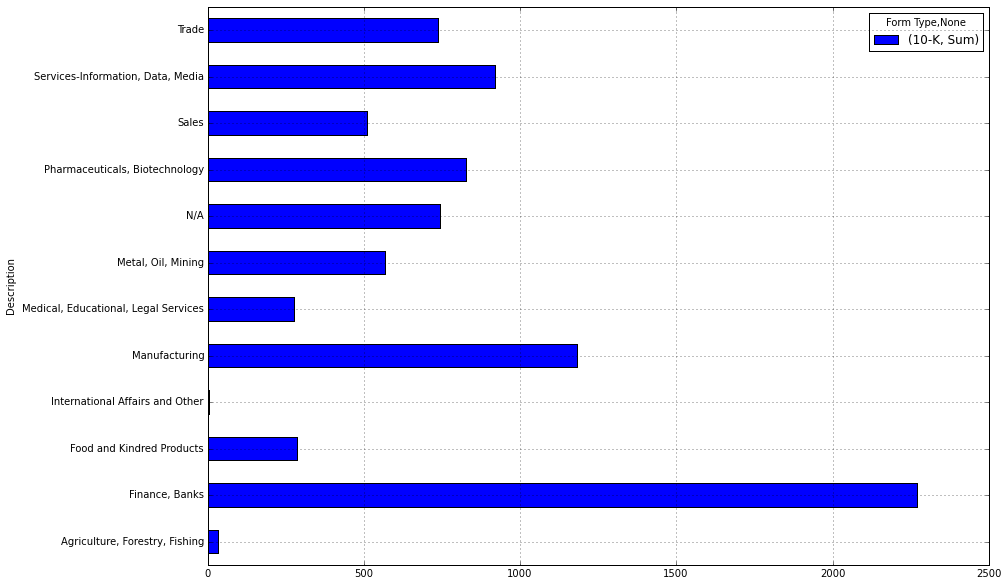

In [52]:
table_sector.sortlevel(axis = 1,  ascending=False).plot(kind='barh', stacked=True, subplots=False, sort_columns = True, figsize =(14,10))

###4.2 H Bar Graph by State_Bus


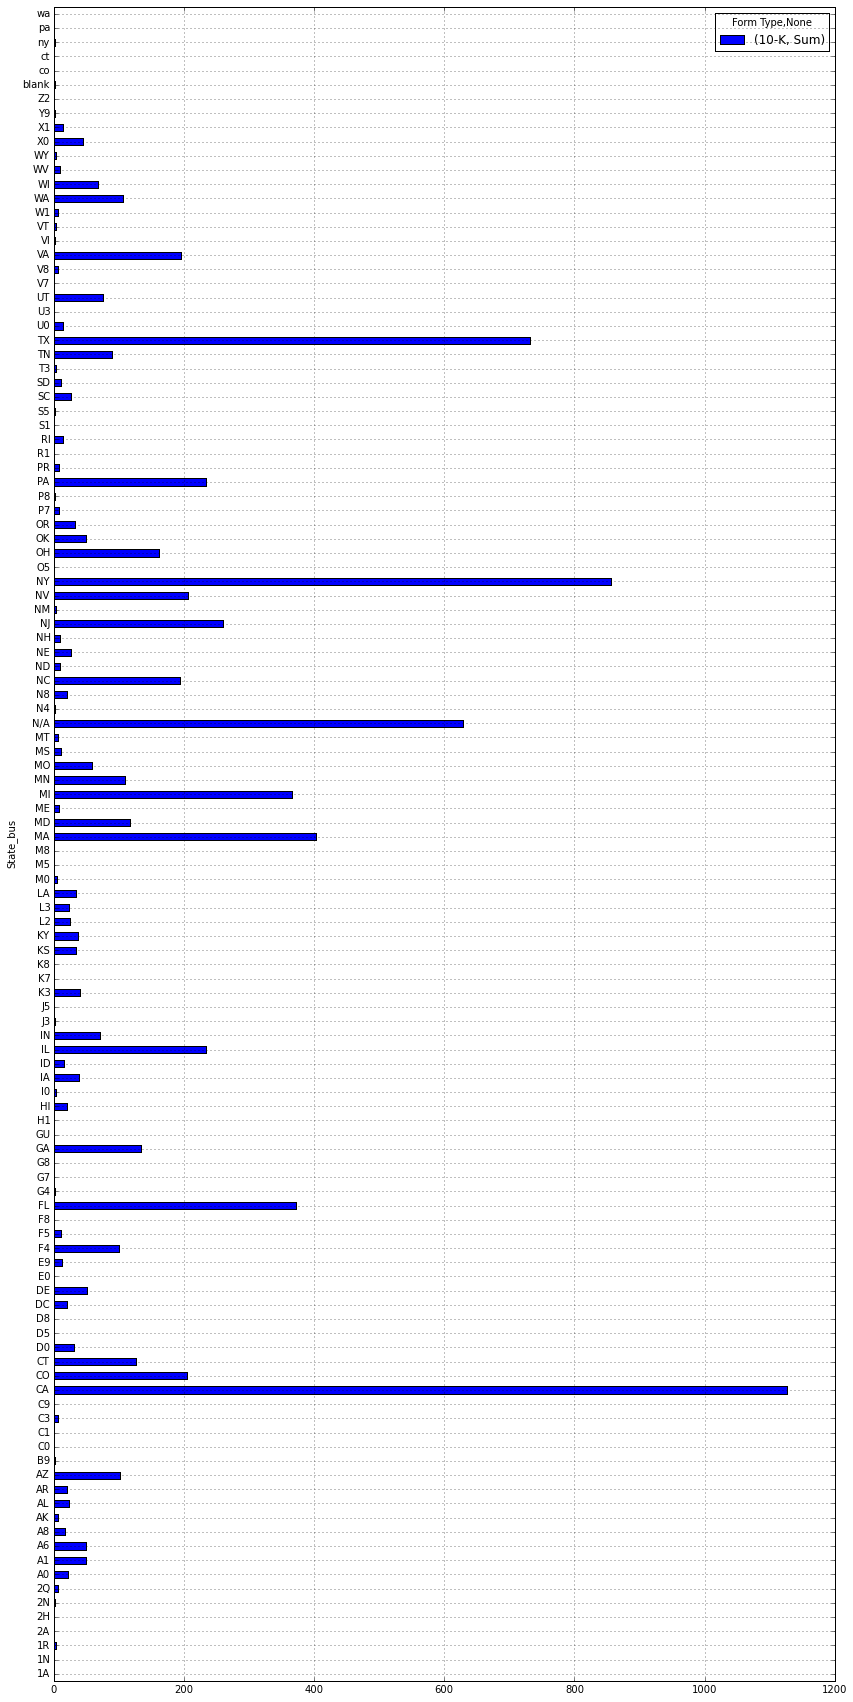

In [53]:
table_business_stat.plot(kind='barh', stacked=True, subplots=False, sort_columns = True, figsize =(14,30))